In [33]:
import argparse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import uproot#4 as uproot
import awkward as ak
from skspatial.plotting import plot_3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import random
import math
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import ticker
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import os
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.special import loggamma
from gaussian2d import gaussian2d, make_nll
from iminuit import Minuit


In [40]:
difMomTheta = np.load('shion_data/shion_contour.npy')[0]
difMomPhi = np.load('shion_data/shion_contour.npy')[1]

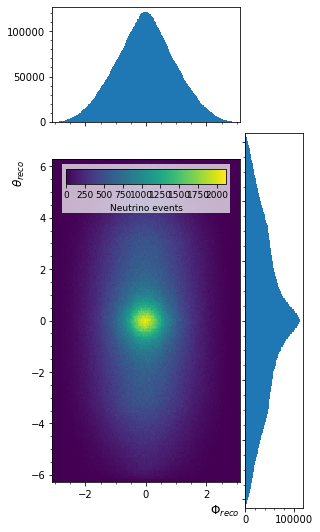

In [43]:
# start with a rectangular Figure
fig2Dhist = plt.figure(1, figsize=(4, 8))

nullfmt = NullFormatter()  # no labels
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02
    
rect_hist2d = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

axHist2D = plt.axes(rect_hist2d)
axHist2D.set_aspect(0.85)
axHistX = plt.axes(rect_histx)
axHistY = plt.axes(rect_histy)
# axCBar = plt.axes(rect_cbar)
# axCBar.axis("off")
    
# no labels
axHistX.xaxis.set_major_formatter(nullfmt)
axHistY.yaxis.set_major_formatter(nullfmt)

time_bins = 200
energy_bins = 200
# the 2d plot:
h, xedges, yedges, im = axHist2D.hist2d(difMomTheta, difMomPhi, bins=(time_bins, energy_bins))
im.set_rasterized(True)
#axHist2D.set_ylim(bottom=-2*np.pi, top=2*np.pi)
    
# color bar
cbbox = inset_axes(axHist2D, "90%", "15%", loc=9)
[ cbbox.spines[k].set_visible(False) for k in cbbox.spines ]
cbbox.tick_params(axis="both", left=False, top=False, right=False,
                      bottom=False, labelleft=False, labeltop=False,
                      labelright=False, labelbottom=False)
cbbox.set_facecolor([1, 1, 1, 0.7])
cbax = inset_axes(cbbox, '95%', '30%', loc=9)
# cbax.axis("off")
cb = plt.colorbar(im, cax=cbax, orientation="horizontal")
cb.set_label("Neutrino events", rotation=0, fontsize=9)
cb.ax.tick_params(labelsize=9)
    
tick_locator = ticker.MaxNLocator(integer=True)
cb.locator = tick_locator
cb.update_ticks()
    
# bins = np.arange(-lim, lim + binwidth, binwidth)
axHistX.hist(difMomTheta, bins=time_bins, histtype="stepfilled")
axHistY.hist(difMomPhi, bins=energy_bins, histtype="stepfilled", orientation="horizontal")
    
axHistX.set_xlim(axHist2D.get_xlim())
axHistY.set_ylim(axHist2D.get_ylim())
    
name = "time_vs_energy_proj"
    
axHist2D.tick_params(axis="both", which="major", labelsize=10)
axHistX.tick_params(axis="both", which="major", labelsize=10)
axHistY.tick_params(axis="both", which="major", labelsize=10)
    
#axHist2D.set_xlabel("$\u03A6_{true}$ - $\u03A6_{reco}$", horizontalalignment="right", x=1.0, fontsize=12)
#axHist2D.set_ylabel("$\u03B8_{true}$ - $\u03B8_{reco}$", horizontalalignment="right", y=1.0, fontsize=12)
axHist2D.set_xlabel("$\u03A6_{reco}$", horizontalalignment="right", x=1.0, fontsize=12)
axHist2D.set_ylabel("$\u03B8_{reco}$", horizontalalignment="right", y=1.0, fontsize=12)

axHist2D.xaxis.set_minor_locator(AutoMinorLocator())
axHist2D.yaxis.set_minor_locator(AutoMinorLocator())
axHistX.xaxis.set_minor_locator(AutoMinorLocator())
axHistX.yaxis.set_minor_locator(AutoMinorLocator())
axHistY.xaxis.set_minor_locator(AutoMinorLocator())
axHistY.yaxis.set_minor_locator(AutoMinorLocator())
    
    